In [12]:
from utils.OddsData import *
from utils.Features import *
import numpy as np
import pandas as pd

## Read Data

In [16]:
data_df = read_odds(countries='all')
data_df = remove_nan_vals(data_df)
data_df = drop_bookies(data_df)
data_df = drop_date_time(data_df)
data_df = transform_odds_to_probs(data_df)
data_df = drop_duplicates(data_df)
# data_df = data_df.drop(['Country'], axis=1)
# data_df.drop_duplicates(inplace=True)
data_df

,Country,League,H_team,A_team,FTHG,FTAG,HT1HG,HT1AG,HT2HG,HT2AG,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,HC_Pinnacle,DC_Pinnacle,AC_Pinnacle
0,germany,3-liga,AlemanniaAachen,PreussenMunster,1,2,0,0,1,2,0.326797,0.297619,0.411523,0.324675,0.295858,0.411523
1,germany,3-liga,ArminiaBielefeld,Chemnitzer,0,0,0,0,0,0,0.450450,0.292398,0.292398,0.446429,0.300300,0.284091
2,germany,2-bundesliga,EnergieCottbus,Paderborn,2,1,0,0,2,1,0.476190,0.278552,0.274725,0.452489,0.296736,0.274725
3,germany,2-bundesliga,FCKoln,FSVFrankfurt,2,1,0,0,2,1,0.490196,0.285714,0.253807,0.540541,0.271003,0.223214
4,england,national-league,CambridgeUtd,Kidderminster,1,3,0,0,1,3,0.462963,0.280899,0.285714,0.436681,0.284900,0.316456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,england,league-two,Walsall,Crawley,2,1,1,1,1,0,0.529101,0.285714,0.220264,0.502513,0.288184,0.242718
48816,england,national-league,YorkCity,Wealdstone,1,2,1,0,0,2,0.558659,0.255102,0.232558,0.502513,0.288184,0.254453
48817,england,league-one,Burton,Plymouth,2,2,1,0,1,2,0.375940,0.274725,0.409836,0.392157,0.269542,0.371747
48818,england,league-one,BristolRovers,Peterborough,1,0,0,0,1,0,0.314465,0.262467,0.456621,0.348432,0.268097,0.416667


## Add features

In [17]:
print('Adding Last Close')
data_df = calculate_last_close_feature(data_df)

print('Adding Last FTR')
data_df = calculate_last_ftr_feature(data_df)

print('Adding MMR')
data_df = calculate_mmr_feature(data_df)

print('Adding Points')
data_df = calculate_points_feature(data_df, num_matches=5)
data_df = calculate_points_feature(data_df, num_matches=10)
data_df = calculate_points_feature(data_df, num_matches=15)

print('Adding Realized EV')
data_df = calculate_realized_ev_feature(data_df, num_matches=3)
data_df = calculate_realized_ev_feature(data_df, num_matches=5)
data_df = calculate_realized_ev_feature(data_df, num_matches=9)

print('Adding Shock')
data_df = calculate_shock_feature(data_df, num_matches=1)
data_df = calculate_shock_feature(data_df, num_matches=3)
data_df = calculate_shock_feature(data_df, num_matches=5)

print('Adding Winstreak')
data_df = calculate_win_streak_feature(data_df)

data_df

Adding Last Close
Adding Last FTR
Adding MMR
Adding Points
Adding Realized EV
Adding Shock
Adding Winstreak


,Country,League,H_team,A_team,FTHG,FTAG,HT1HG,HT1AG,HT2HG,HT2AG,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,germany,3-liga,AlemanniaAachen,PreussenMunster,1,2,0,0,1,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,germany,3-liga,ArminiaBielefeld,Chemnitzer,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,germany,2-bundesliga,EnergieCottbus,Paderborn,2,1,0,0,2,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,germany,2-bundesliga,FCKoln,FSVFrankfurt,2,1,0,0,2,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,england,national-league,CambridgeUtd,Kidderminster,1,3,0,0,1,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,england,league-two,Walsall,Crawley,2,1,1,1,1,0,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
48816,england,national-league,YorkCity,Wealdstone,1,2,1,0,0,2,...,-3.457133,-4.652999,-0.481162,0.150830,-1.400217,-0.232407,-2.014425,-1.977025,-3,1
48817,england,league-one,Burton,Plymouth,2,2,1,0,1,2,...,-3.739979,1.758084,0.355872,-0.383142,0.671257,0.365279,0.632352,1.780395,-2,11
48818,england,league-one,BristolRovers,Peterborough,1,0,0,0,1,0,...,-3.126201,1.576642,-0.500000,-0.669260,-0.463553,-0.035727,1.842694,-0.569305,-1,-1


## Drop Results columns

In [19]:
data_df = data_df.drop(['FTHG', 'FTAG', 'HT1HG', 'HT1AG', 'HT2HG', 'HT2AG'], axis=1)
data_df

,Country,League,H_team,A_team,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,HC_Pinnacle,DC_Pinnacle,AC_Pinnacle,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,germany,3-liga,AlemanniaAachen,PreussenMunster,0.326797,0.297619,0.411523,0.324675,0.295858,0.411523,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,germany,3-liga,ArminiaBielefeld,Chemnitzer,0.450450,0.292398,0.292398,0.446429,0.300300,0.284091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,germany,2-bundesliga,EnergieCottbus,Paderborn,0.476190,0.278552,0.274725,0.452489,0.296736,0.274725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,germany,2-bundesliga,FCKoln,FSVFrankfurt,0.490196,0.285714,0.253807,0.540541,0.271003,0.223214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,england,national-league,CambridgeUtd,Kidderminster,0.462963,0.280899,0.285714,0.436681,0.284900,0.316456,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,england,league-two,Walsall,Crawley,0.529101,0.285714,0.220264,0.502513,0.288184,0.242718,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
48816,england,national-league,YorkCity,Wealdstone,0.558659,0.255102,0.232558,0.502513,0.288184,0.254453,...,-3.457133,-4.652999,-0.481162,0.150830,-1.400217,-0.232407,-2.014425,-1.977025,-3,1
48817,england,league-one,Burton,Plymouth,0.375940,0.274725,0.409836,0.392157,0.269542,0.371747,...,-3.739979,1.758084,0.355872,-0.383142,0.671257,0.365279,0.632352,1.780395,-2,11
48818,england,league-one,BristolRovers,Peterborough,0.314465,0.262467,0.456621,0.348432,0.268097,0.416667,...,-3.126201,1.576642,-0.500000,-0.669260,-0.463553,-0.035727,1.842694,-0.569305,-1,-1


In [18]:
data_df.loc[data_df['League'] == 'premier-league'].reset_index(drop=True)
#premier_league_df

,Country,League,H_team,A_team,FTHG,FTAG,HT1HG,HT1AG,HT2HG,HT2AG,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,england,premier-league,Arsenal,Chelsea,1,2,1,1,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,england,premier-league,Sunderland,Wigan,1,0,0,0,1,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,england,premier-league,Stoke,Swansea,2,0,2,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,england,premier-league,Reading,Newcastle,2,2,0,0,2,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,england,premier-league,Norwich,Liverpool,2,5,0,2,2,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,england,premier-league,Wolves,Arsenal,0,2,0,0,0,2,...,-4.231531,2.902889,-0.210165,0.628253,-2.665770,0.854216,-2.552054,1.852254,-3,6
3812,england,premier-league,ManchesterCity,Brentford,1,2,1,1,0,1,...,4.876975,-4.108801,-0.632415,0.342466,-0.704236,-2.189003,-0.981592,-0.563301,3,-1
3813,england,premier-league,WestHam,Leicester,0,2,0,1,0,1,...,-2.464439,-1.980114,-1.094318,1.324324,-0.750851,3.770688,-1.450107,4.525200,-2,1
3814,england,premier-league,Fulham,ManchesterUtd,1,2,0,1,1,1,...,-3.340525,-0.384909,0.632415,-1.483954,1.300911,-0.785746,2.805761,-0.089560,-1,-1


In [11]:
#data_df = data_df.loc[data_df['League'] != 'premier-league'].reset_index(drop=True)
#data_df

,Country,League,H_team,A_team,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,HC_Pinnacle,DC_Pinnacle,AC_Pinnacle,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,germany,bundesliga,BayernMunich,Wolfsburg,0.806452,0.142857,0.068966,0.847458,0.118906,0.052687,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,germany,3-liga,StuttgartII,HansaRostock,0.404858,0.298507,0.332226,0.432900,0.309598,0.294985,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,england,national-league,Hereford,ForestGreen,0.373134,0.289855,0.366300,0.358423,0.304878,0.373134,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,england,national-league,Grimsby,Gateshead,0.537634,0.268817,0.224719,0.534759,0.267380,0.233100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,england,national-league,Ebbsfleet,Woking,0.381679,0.285714,0.362319,0.383142,0.284091,0.384615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44950,england,league-two,Tranmere,AFCWimbledon,0.495050,0.292398,0.248139,0.487805,0.303951,0.241546,...,-1.438524,-1.932454,0.304878,0.273973,-0.914073,1.708216,-1.823350,2.166792,-1,3
44951,england,league-two,Walsall,Crawley,0.529101,0.285714,0.220264,0.502513,0.288184,0.242718,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
44952,england,league-two,Salford,Carlisle,0.510204,0.285714,0.239234,0.378788,0.301205,0.352113,...,-2.639488,-1.739262,-0.460829,-0.431034,-1.541638,0.716994,-1.649600,-0.685979,-2,1
44953,england,league-two,StockportCounty,LeytonOrient,0.442478,0.311526,0.279330,0.476190,0.306748,0.250627,...,0.118808,0.395180,0.416493,0.994975,1.422421,-0.018575,3.583672,1.277447,4,1


## Let's try and drop teams

`Idea`: Maybe MMR is a good proxy for team!  

Let's also drop the country for good measure...

In [20]:
data_without_teams_df = data_df.drop(['H_team', 'A_team', 'Country'], axis=1)
data_without_teams_df

,League,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,HC_Pinnacle,DC_Pinnacle,AC_Pinnacle,H_LastOdds,A_LastOdds,H_LastFTG,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,3-liga,0.326797,0.297619,0.411523,0.324675,0.295858,0.411523,0.324675,0.411523,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,3-liga,0.450450,0.292398,0.292398,0.446429,0.300300,0.284091,0.446429,0.284091,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,2-bundesliga,0.476190,0.278552,0.274725,0.452489,0.296736,0.274725,0.452489,0.274725,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,2-bundesliga,0.490196,0.285714,0.253807,0.540541,0.271003,0.223214,0.540541,0.223214,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,national-league,0.462963,0.280899,0.285714,0.436681,0.284900,0.316456,0.436681,0.316456,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,league-two,0.529101,0.285714,0.220264,0.502513,0.288184,0.242718,0.241546,0.495050,0,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
48816,national-league,0.558659,0.255102,0.232558,0.502513,0.288184,0.254453,0.502513,0.254453,0,...,-3.457133,-4.652999,-0.481162,0.150830,-1.400217,-0.232407,-2.014425,-1.977025,-3,1
48817,league-one,0.375940,0.274725,0.409836,0.392157,0.269542,0.371747,0.297619,0.452489,0,...,-3.739979,1.758084,0.355872,-0.383142,0.671257,0.365279,0.632352,1.780395,-2,11
48818,league-one,0.314465,0.262467,0.456621,0.348432,0.268097,0.416667,0.203666,0.584795,0,...,-3.126201,1.576642,-0.500000,-0.669260,-0.463553,-0.035727,1.842694,-0.569305,-1,-1


## Let's one-hot encode league

The NN can't handle categorical features and league gives context to the MMR

In [148]:
# from sklearn.preprocessing import OneHotEncoder

# #creating instance of one-hot-encoder
# encoder = OneHotEncoder()

# #perform one-hot encoding on 'League' column 
# encoder_df = pd.DataFrame(encoder.fit_transform(data_without_teams_df[['League']]).toarray())
# # encoder_df

# # #merge one-hot encoded columns back with original DataFrame
# data_without_teams_df = data_without_teams_df.join(encoder_df)

# data_without_teams_df = data_without_teams_df.drop(['League'], axis=1)
# data_without_teams_df

,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,HC_Pinnacle,DC_Pinnacle,AC_Pinnacle,H_LastOdds,A_LastOdds,H_LastFTG,A_LastFTG,...,H_winstreak,A_winstreak,0,1,2,3,4,5,6,7
0,0.373134,0.289855,0.366300,0.358423,0.304878,0.373134,0.358423,0.373134,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.537634,0.268817,0.224719,0.534759,0.267380,0.233100,0.534759,0.233100,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.381679,0.285714,0.362319,0.383142,0.284091,0.384615,0.383142,0.384615,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.414938,0.283286,0.331126,0.390625,0.289017,0.358423,0.390625,0.358423,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.478469,0.275482,0.276243,0.458716,0.280899,0.296736,0.458716,0.296736,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21835,0.337838,0.263852,0.442478,0.331126,0.246914,0.467290,0.331126,0.467290,0,0,...,-2,-4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21836,0.558659,0.243902,0.244499,0.636943,0.225734,0.187266,0.636943,0.187266,0,0,...,2,-3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21837,0.492611,0.256410,0.296736,0.471698,0.265957,0.308642,0.258398,0.512821,1,3,...,4,-2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21838,0.552486,0.246914,0.248756,0.568182,0.237530,0.243309,0.182815,0.613497,2,2,...,2,-1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
data_without_teams_df

,League,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,HC_Pinnacle,DC_Pinnacle,AC_Pinnacle,H_LastOdds,A_LastOdds,H_LastFTG,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,3-liga,0.326797,0.297619,0.411523,0.324675,0.295858,0.411523,0.324675,0.411523,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,3-liga,0.450450,0.292398,0.292398,0.446429,0.300300,0.284091,0.446429,0.284091,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,2-bundesliga,0.476190,0.278552,0.274725,0.452489,0.296736,0.274725,0.452489,0.274725,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,2-bundesliga,0.490196,0.285714,0.253807,0.540541,0.271003,0.223214,0.540541,0.223214,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,national-league,0.462963,0.280899,0.285714,0.436681,0.284900,0.316456,0.436681,0.316456,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,league-two,0.529101,0.285714,0.220264,0.502513,0.288184,0.242718,0.241546,0.495050,0,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
48816,national-league,0.558659,0.255102,0.232558,0.502513,0.288184,0.254453,0.502513,0.254453,0,...,-3.457133,-4.652999,-0.481162,0.150830,-1.400217,-0.232407,-2.014425,-1.977025,-3,1
48817,league-one,0.375940,0.274725,0.409836,0.392157,0.269542,0.371747,0.297619,0.452489,0,...,-3.739979,1.758084,0.355872,-0.383142,0.671257,0.365279,0.632352,1.780395,-2,11
48818,league-one,0.314465,0.262467,0.456621,0.348432,0.268097,0.416667,0.203666,0.584795,0,...,-3.126201,1.576642,-0.500000,-0.669260,-0.463553,-0.035727,1.842694,-0.569305,-1,-1


## Split the Data: Train, Val, Test

In [42]:
data_for_splitting = data_without_teams_df.copy()
training_df = data_for_splitting.loc[data_for_splitting['League'] != 'premier-league']
training_df = training_df.drop(['League'], axis=1)

train_size = 0.85
val_size = 0.15

assert train_size + val_size == 1.0

train_index = int(len(training_df)*train_size)
df_train = training_df[0:train_index]
df_valid = training_df[train_index:]

target_columns = ['HC_Pinnacle', 'DC_Pinnacle', 'AC_Pinnacle']

X, y = training_df.drop(columns=target_columns), training_df[target_columns]
X_train, y_train = df_train.drop(columns=target_columns).copy(), df_train[target_columns].copy()
X_valid, y_valid = df_valid.drop(columns=target_columns).copy(), df_valid[target_columns].copy()

In [43]:
finetuning_df = data_for_splitting.loc[data_for_splitting['League'] == 'premier-league']
finetuning_df = finetuning_df.drop(['League'], axis=1)

train_size = 0.70
val_size = 0.15
test_size = 0.15

assert train_size + val_size + test_size == 1.0

train_index = int(len(finetuning_df)*train_size)
val_index = train_index + int(len(finetuning_df)*val_size)
df_train = finetuning_df[0:train_index]
df_valid = finetuning_df[train_index:val_index]
df_test = finetuning_df[val_index:]

target_columns = ['HC_Pinnacle', 'DC_Pinnacle', 'AC_Pinnacle']

X_finetuning, y_finetuning = finetuning_df.drop(columns=target_columns), finetuning_df[target_columns]
X_finetuning_train, y_finetuning_train = df_train.drop(columns=target_columns).copy(), df_train[target_columns].copy()
X_finetuning_valid, y_finetuning_valid = df_valid.drop(columns=target_columns).copy(), df_valid[target_columns].copy()
X_finetuning_test, y_finetuning_test = df_valid.drop(columns=target_columns).copy(), df_valid[target_columns].copy()

In [44]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)

(38253, 29)
(38253, 3)
(6751, 29)
(6751, 3)


(None, None)

In [45]:
print(X_finetuning_train.shape), print(y_finetuning_train.shape)
print(X_finetuning_valid.shape), print(y_finetuning_valid.shape)
print(X_finetuning_test.shape), print(y_finetuning_test.shape)

(2671, 29)
(2671, 3)
(572, 29)
(572, 3)
(572, 29)
(572, 3)


(None, None)

In [46]:
X

,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,H_LastOdds,A_LastOdds,H_LastFTG,A_LastFTG,H_MMR,A_MMR,H_5Points,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,0.326797,0.297619,0.411523,0.324675,0.411523,0,0,25.000000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,0.450450,0.292398,0.292398,0.446429,0.284091,0,0,25.000000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,0.476190,0.278552,0.274725,0.452489,0.274725,0,0,25.000000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,0.490196,0.285714,0.253807,0.540541,0.223214,0,0,25.000000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,0.462963,0.280899,0.285714,0.436681,0.316456,0,0,25.000000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,0.529101,0.285714,0.220264,0.241546,0.495050,0,1,23.769969,23.687368,8,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
48816,0.558659,0.255102,0.232558,0.502513,0.254453,0,0,24.060664,24.253915,2,...,-3.457133,-4.652999,-0.481162,0.150830,-1.400217,-0.232407,-2.014425,-1.977025,-3,1
48817,0.375940,0.274725,0.409836,0.297619,0.452489,0,0,23.770809,26.678957,5,...,-3.739979,1.758084,0.355872,-0.383142,0.671257,0.365279,0.632352,1.780395,-2,11
48818,0.314465,0.262467,0.456621,0.203666,0.584795,0,0,24.783846,25.092602,6,...,-3.126201,1.576642,-0.500000,-0.669260,-0.463553,-0.035727,1.842694,-0.569305,-1,-1


In [47]:
y

,HC_Pinnacle,DC_Pinnacle,AC_Pinnacle
0,0.324675,0.295858,0.411523
1,0.446429,0.300300,0.284091
2,0.452489,0.296736,0.274725
3,0.540541,0.271003,0.223214
4,0.436681,0.284900,0.316456
...,...,...,...
48815,0.502513,0.288184,0.242718
48816,0.502513,0.288184,0.254453
48817,0.392157,0.269542,0.371747
48818,0.348432,0.268097,0.416667


## Plotting distribution of the newly created features

Let's plot some values to see their distribution...

In [28]:
import matplotlib.pyplot as plt
print(X.columns)

Index(['League', 'HO_Pinnacle', 'DO_Pinnacle', 'AO_Pinnacle', 'H_LastOdds',
       'A_LastOdds', 'H_LastFTG', 'A_LastFTG', 'H_MMR', 'A_MMR', 'H_5Points',
       'A_5Points', 'H_10Points', 'A_10Points', 'H_15Points', 'A_15Points',
       'H_3EVs', 'A_3EVs', 'H_5EVs', 'A_5EVs', 'H_9EVs', 'A_9EVs', 'H_1shock',
       'A_1shock', 'H_3shock', 'A_3shock', 'H_5shock', 'A_5shock',
       'H_winstreak', 'A_winstreak'],
      dtype='object')


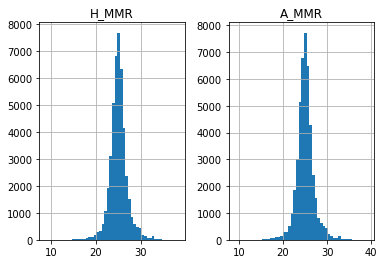

In [29]:
X[['H_MMR', 'A_MMR']].hist(bins=50)
plt.show()

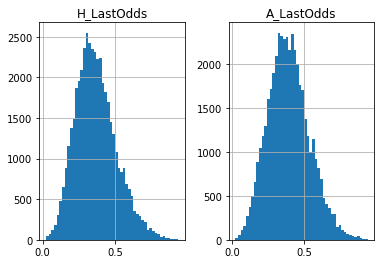

In [30]:
X[['H_LastOdds',	'A_LastOdds']].hist(bins=50)
plt.show()

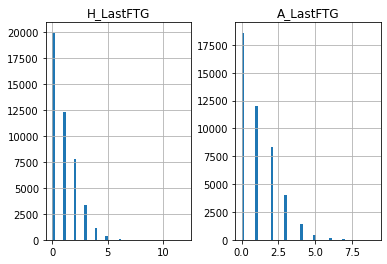

In [31]:
X[['H_LastFTG',   'A_LastFTG']].hist(bins=50)
plt.show()

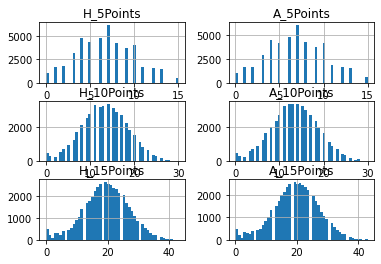

In [33]:
X[['H_5Points',  'A_5Points', 'H_10Points', 'A_10Points', 'H_15Points', 'A_15Points']].hist(bins=50)
plt.show()

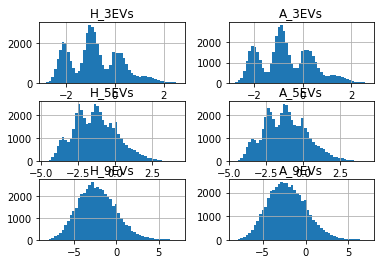

In [34]:
X[['H_3EVs', 'A_3EVs', 'H_5EVs', 'A_5EVs', 'H_9EVs', 'A_9EVs']].hist(bins=50)
plt.show()

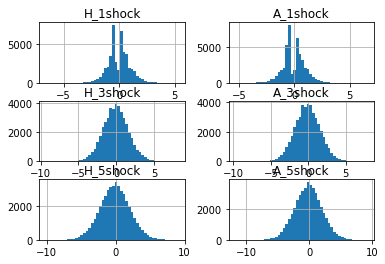

In [35]:
X[['H_1shock', 'A_1shock', 'H_3shock', 'A_3shock', 'H_5shock', 'A_5shock']].hist(bins=50)
plt.show()

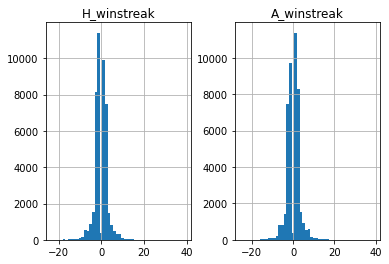

In [36]:
X[['H_winstreak', 'A_winstreak']].hist(bins=50)
plt.show()

## Scaling

We need to scale all these features, time to deploy MinMaxScaler!

In [48]:
X_train

,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,H_LastOdds,A_LastOdds,H_LastFTG,A_LastFTG,H_MMR,A_MMR,H_5Points,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,0.326797,0.297619,0.411523,0.324675,0.411523,0,0,25.000000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,0.450450,0.292398,0.292398,0.446429,0.284091,0,0,25.000000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,0.476190,0.278552,0.274725,0.452489,0.274725,0,0,25.000000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,0.490196,0.285714,0.253807,0.540541,0.223214,0,0,25.000000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,0.462963,0.280899,0.285714,0.436681,0.316456,0,0,25.000000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41450,0.334448,0.326797,0.371747,0.337838,0.371747,0,2,27.473645,27.286199,5,...,-4.257391,-3.091207,-2.117647,-0.462963,-2.054695,0.715151,-4.676855,0.112163,-1,1
41451,0.198413,0.259740,0.591716,0.173310,0.606061,1,4,23.354004,26.346938,3,...,-6.010732,1.359923,1.307387,0.539171,-0.435642,-1.899638,-2.120566,-2.536817,1,1
41452,0.245700,0.291545,0.507614,0.180505,0.598802,1,0,24.921262,25.213737,5,...,-1.726061,1.922916,0.214133,0.936170,0.052628,3.065559,-1.179716,4.921369,1,5
41453,0.534759,0.276243,0.235849,0.386100,0.330033,4,0,26.499933,25.953136,13,...,2.658256,-2.541531,1.000000,-2.206349,2.947804,-3.881384,2.851953,-3.440559,7,-2


In [49]:
X.columns

Index(['HO_Pinnacle', 'DO_Pinnacle', 'AO_Pinnacle', 'H_LastOdds', 'A_LastOdds',
       'H_LastFTG', 'A_LastFTG', 'H_MMR', 'A_MMR', 'H_5Points', 'A_5Points',
       'H_10Points', 'A_10Points', 'H_15Points', 'A_15Points', 'H_3EVs',
       'A_3EVs', 'H_5EVs', 'A_5EVs', 'H_9EVs', 'A_9EVs', 'H_1shock',
       'A_1shock', 'H_3shock', 'A_3shock', 'H_5shock', 'A_5shock',
       'H_winstreak', 'A_winstreak'],
      dtype='object')

In [84]:
from sklearn.preprocessing import MinMaxScaler

columns = ['H_LastFTG', 'A_LastFTG', 'H_MMR', 'A_MMR', 'H_5Points', 'A_5Points',
       'H_10Points', 'A_10Points', 'H_15Points', 'A_15Points', 'H_3EVs',
       'A_3EVs', 'H_5EVs', 'A_5EVs', 'H_9EVs', 'A_9EVs', 'H_1shock',
       'A_1shock', 'H_3shock', 'A_3shock', 'H_5shock', 'A_5shock',
       'H_winstreak', 'A_winstreak']

training_scaler = MinMaxScaler()

print(training_scaler.fit(X_train[columns]))
X_train_scale = X_train.copy()
X_train_scale[columns] = training_scaler.transform(X_train[columns])

X_val_scale = X_valid.copy()
X_val_scale[columns] = training_scaler.transform(X_valid[columns])



finetuning_scaler = MinMaxScaler()

print(finetuning_scaler.fit(X_finetuning_train[columns]))
X_finetuning_train_scale = X_finetuning_train.copy()
X_finetuning_train_scale[columns] = finetuning_scaler.transform(X_finetuning_train[columns])

X_finetuning_val_scale = X_finetuning_valid.copy()
X_finetuning_val_scale[columns] = finetuning_scaler.transform(X_finetuning_valid[columns])

X_finetuning_test_scale = X_finetuning_test.copy()
X_finetuning_test_scale[columns] = finetuning_scaler.transform(X_finetuning_test[columns])

X_finetuning_train_scale

MinMaxScaler()
MinMaxScaler()


,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,H_LastOdds,A_LastOdds,H_LastFTG,A_LastFTG,H_MMR,A_MMR,H_5Points,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
95,0.440529,0.289017,0.290698,0.456621,0.273973,0.000,0.000,0.469083,0.418841,0.000000,...,0.499647,0.502855,0.483768,0.500000,0.486398,0.448841,0.452573,0.492086,0.358974,0.333333
96,0.502513,0.278552,0.239234,0.444444,0.276243,0.000,0.000,0.469083,0.418841,0.000000,...,0.499647,0.502855,0.483768,0.500000,0.486398,0.448841,0.452573,0.492086,0.358974,0.333333
97,0.500000,0.281690,0.238663,0.507614,0.230415,0.000,0.000,0.469083,0.418841,0.000000,...,0.499647,0.502855,0.483768,0.500000,0.486398,0.448841,0.452573,0.492086,0.358974,0.333333
98,0.310559,0.289855,0.420168,0.349650,0.375940,0.000,0.000,0.469083,0.418841,0.000000,...,0.499647,0.502855,0.483768,0.500000,0.486398,0.448841,0.452573,0.492086,0.358974,0.333333
99,0.215983,0.265252,0.540541,0.202840,0.561798,0.000,0.000,0.469083,0.418841,0.000000,...,0.499647,0.502855,0.483768,0.500000,0.486398,0.448841,0.452573,0.492086,0.358974,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34721,0.826446,0.142857,0.059701,0.746269,0.099404,0.125,0.000,0.813568,0.467441,0.866667,...,0.805503,0.293769,0.456640,0.404110,0.537310,0.400185,0.446437,0.457380,1.000000,0.282051
34723,0.436681,0.303951,0.286533,0.338983,0.375940,0.125,0.375,0.542108,0.486400,0.400000,...,0.351911,0.174187,0.774029,0.518571,0.656229,0.340776,0.603331,0.382203,0.410256,0.230769
34729,0.714286,0.192678,0.123457,0.800000,0.076104,0.250,0.000,0.723053,0.485693,0.800000,...,0.684722,0.189576,0.527255,0.532811,0.559841,0.248676,0.532146,0.225286,0.333333,0.205128
34732,0.066845,0.141044,0.819672,0.064809,0.847458,0.250,0.125,0.531375,0.779599,0.466667,...,0.245616,0.782355,0.333483,0.470229,0.560659,0.265455,0.519502,0.363297,0.333333,0.358974


In [72]:
from sklearn.preprocessing import MaxAbsScaler

columns = ['H_LastFTG', 'A_LastFTG', 'H_MMR', 'A_MMR', 'H_5Points', 'A_5Points',
       'H_10Points', 'A_10Points', 'H_15Points', 'A_15Points', 'H_3EVs',
       'A_3EVs', 'H_5EVs', 'A_5EVs', 'H_9EVs', 'A_9EVs', 'H_1shock',
       'A_1shock', 'H_3shock', 'A_3shock', 'H_5shock', 'A_5shock',
       'H_winstreak', 'A_winstreak']

training_scaler = MaxAbsScaler()

print(training_scaler.fit(X_train[columns]))
X_train_scale = X_train.copy()
X_train_scale[columns] = training_scaler.transform(X_train[columns])

X_val_scale = X_valid.copy()
X_val_scale[columns] = training_scaler.transform(X_valid[columns])



finetuning_scaler = MaxAbsScaler()

print(finetuning_scaler.fit(X_finetuning_train[columns]))
X_finetuning_train_scale = X_finetuning_train.copy()
X_finetuning_train_scale[columns] = finetuning_scaler.transform(X_finetuning_train[columns])

X_finetuning_val_scale = X_finetuning_valid.copy()
X_finetuning_val_scale[columns] = finetuning_scaler.transform(X_finetuning_valid[columns])

X_finetuning_test_scale = X_finetuning_test.copy()
X_finetuning_test_scale[columns] = finetuning_scaler.transform(X_finetuning_test[columns])

X_finetuning_train_scale

MaxAbsScaler()
MaxAbsScaler()


,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,H_LastOdds,A_LastOdds,H_LastFTG,A_LastFTG,H_MMR,A_MMR,H_5Points,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
95,0.440529,0.289017,0.290698,0.456621,0.273973,0.000,0.000,0.699607,0.678958,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
96,0.502513,0.278552,0.239234,0.444444,0.276243,0.000,0.000,0.699607,0.678958,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
97,0.500000,0.281690,0.238663,0.507614,0.230415,0.000,0.000,0.699607,0.678958,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
98,0.310559,0.289855,0.420168,0.349650,0.375940,0.000,0.000,0.699607,0.678958,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
99,0.215983,0.265252,0.540541,0.202840,0.561798,0.000,0.000,0.699607,0.678958,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34721,0.826446,0.142857,0.059701,0.746269,0.099404,0.125,0.000,0.894517,0.705806,0.866667,...,0.611279,-0.415798,-0.052549,-0.191781,0.099127,-0.088280,-0.011207,-0.068330,1.00,-0.076923
34723,0.436681,0.303951,0.286533,0.338983,0.375940,0.125,0.375,0.740925,0.716279,0.400000,...,-0.295264,-0.653603,0.562268,0.037143,0.330666,-0.196069,0.275393,-0.216342,0.08,-0.153846
34729,0.714286,0.192678,0.123457,0.800000,0.076104,0.250,0.000,0.843303,0.715889,0.800000,...,0.369889,-0.623001,0.084240,0.065622,0.142997,-0.363171,0.145359,-0.525286,-0.04,-0.192308
34732,0.066845,0.141044,0.819672,0.064809,0.847458,0.250,0.125,0.734852,0.878247,0.466667,...,-0.507704,0.555827,-0.291118,-0.059542,0.144588,-0.332727,0.122262,-0.253566,-0.04,0.038462


In [73]:
X_train_scale

,HO_Pinnacle,DO_Pinnacle,AO_Pinnacle,H_LastOdds,A_LastOdds,H_LastFTG,A_LastFTG,H_MMR,A_MMR,H_5Points,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,0.326797,0.297619,0.411523,0.324675,0.411523,0.000000,0.000000,0.652770,0.638108,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.450450,0.292398,0.292398,0.446429,0.284091,0.000000,0.000000,0.652770,0.638108,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.476190,0.278552,0.274725,0.452489,0.274725,0.000000,0.000000,0.652770,0.638108,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.490196,0.285714,0.253807,0.540541,0.223214,0.000000,0.000000,0.652770,0.638108,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.462963,0.280899,0.285714,0.436681,0.316456,0.000000,0.000000,0.652770,0.638108,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41450,0.334448,0.326797,0.371747,0.337838,0.371747,0.000000,0.222222,0.717359,0.696462,0.333333,...,-0.513088,-0.376045,-0.321119,-0.070203,-0.220749,0.073181,-0.462130,0.009567,-0.025641,0.025641
41451,0.198413,0.259740,0.591716,0.173310,0.606061,0.083333,0.444444,0.609792,0.672488,0.200000,...,-0.724396,0.165434,0.198251,0.081759,-0.046804,-0.194390,-0.209538,-0.216385,0.025641,0.025641
41452,0.245700,0.291545,0.507614,0.180505,0.598802,0.083333,0.000000,0.650714,0.643563,0.333333,...,-0.208020,0.233922,0.032471,0.141960,0.005654,0.313699,-0.116570,0.419782,0.025641,0.128205
41453,0.534759,0.276243,0.235849,0.386100,0.330033,0.333333,0.000000,0.691935,0.662436,0.866667,...,0.320365,-0.309177,0.151639,-0.334569,0.316702,-0.397183,0.281808,-0.293472,0.179487,-0.051282


## Modelling

**Input layer**: The number of neurons in the input layer is calculated as follows:  
```Number of features in the training set + 1```  

In this case, as there were 29 features in the training set to begin with, 30 input neurons are defined accordingly.  

**Hidden layer**: One hidden layer is defined, as a single layer is suitable when working with most datasets. The number of neurons in the hidden layer is determined as follows:  
```Training Data Samples/Factor * (Input Neurons + Output Neurons)```  

A factor of 1 is set in this case, the purpose of the factor being to prevent overfitting. A factor can take a value between 1 and 10. With 30 neurons in the input layer, 3 neuron in the output layer and 38,250 observations in the training set, the hidden layer is assigned 1200 neurons.  

**Output layer**: As this is the result layer, the output layer takes a value of 3.


In [86]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(29 + 1, input_dim=29, kernel_initializer='normal', activation='relu'))
model.add(Dense(1200, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(800, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(800, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(800, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 30)                900       
_________________________________________________________________
dense_23 (Dense)             (None, 1200)              37200     
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 3603      
Total params: 41,703
Trainable params: 41,703
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train_scale, y_train, epochs=50, batch_size=400, verbose=1, validation_data=(X_val_scale, y_valid))
predictions = model.predict(X_val_scale)

Epoch 1/50
383/383 [==============================] - 5s 13ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0359 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0341
Epoch 2/50
383/383 [==============================] - 6s 14ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0269 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0325
Epoch 3/50
383/383 [==============================] - 6s 15ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0260 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0328
Epoch 4/50
383/383 [==============================] - 6s 15ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0259 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0316
Epoch 5/50
383/383 [==============================] - 6s 15ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0257 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0318
Epoch 6/50
383/383 [==============================] - 5s 14ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0250 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0312
Epoch 7/50

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


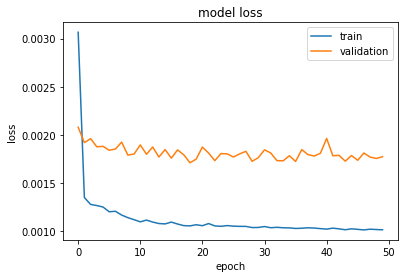

MSE between Preds  & True:  0.0017723933633668233
MSE between Open  & Close:  0.002031557260472798


In [81]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

from sklearn.metrics import mean_squared_error

print('MSE between Preds  & True: ',mean_squared_error(predictions,y_valid))
print('MSE between Open  & Close: ',mean_squared_error(X_valid[['HO_Pinnacle',	'DO_Pinnacle',	'AO_Pinnacle']],y_valid))

In [82]:
history=model.fit(X_finetuning_train_scale, y_finetuning_train, epochs=50, batch_size=200, verbose=1, validation_data=(X_finetuning_val_scale, y_finetuning_valid))
predictions = model.predict(X_finetuning_val_scale)

Epoch 1/50
14/14 [==============================] - 0s 23ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0226 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0313
Epoch 2/50
14/14 [==============================] - 0s 21ms/step - loss: 9.4327e-04 - mse: 9.4327e-04 - mae: 0.0218 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0321
Epoch 3/50
14/14 [==============================] - 0s 20ms/step - loss: 9.3447e-04 - mse: 9.3447e-04 - mae: 0.0219 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0314
Epoch 4/50
14/14 [==============================] - 0s 22ms/step - loss: 8.9630e-04 - mse: 8.9630e-04 - mae: 0.0212 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0314
Epoch 5/50
14/14 [==============================] - 0s 24ms/step - loss: 8.7921e-04 - mse: 8.7921e-04 - mae: 0.0211 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0314
Epoch 6/50
14/14 [==============================] - 0s 21ms/step - loss: 8.8024e-04 - mse: 8.8024e-04 - mae: 0.0211 - val_loss: 0.0019 - val_mse: 0.0019 

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


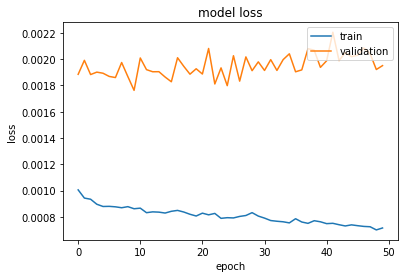

MSE between Preds  & True:  0.0019509924457563933
MSE between Open  & Close:  0.0020547371362986456


In [83]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

from sklearn.metrics import mean_squared_error

print('MSE between Preds  & True: ',mean_squared_error(predictions,y_finetuning_valid))
print('MSE between Open  & Close: ',mean_squared_error(X_finetuning_val_scale[['HO_Pinnacle',	'DO_Pinnacle',	'AO_Pinnacle']],y_finetuning_valid))

In [192]:
model = Sequential()
model.add(Dense(26, input_dim=25, kernel_initializer='normal', activation='elu'))
model.add(Dense(800, activation='elu'))
# model.add(Dropout(0.2))
# model.add(Dense(776, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 26)                676       
_________________________________________________________________
dense_120 (Dense)            (None, 800)               21600     
_________________________________________________________________
dense_121 (Dense)            (None, 3)                 2403      
Total params: 24,679
Trainable params: 24,679
Non-trainable params: 0
_________________________________________________________________


In [193]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(Xtrain_scale_np, y_train_np, epochs=30, batch_size=100, verbose=1, validation_data=(Xval_scale_np, y_valid_np))
predictions = model.predict(Xval_scale_np)

Epoch 1/30
153/153 [==============================] - 1s 6ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0466 - val_loss: 0.0023 - val_mse: 0.0023 - val_mae: 0.0364
Epoch 2/30
153/153 [==============================] - 1s 5ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0277 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0329
Epoch 3/30
153/153 [==============================] - 1s 5ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0260 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0319
Epoch 4/30
153/153 [==============================] - 1s 5ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0314
Epoch 5/30
153/153 [==============================] - 1s 5ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0238 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0322
Epoch 6/30
153/153 [==============================] - 1s 5ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0239 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0311
Epoch 7/30
153/1

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


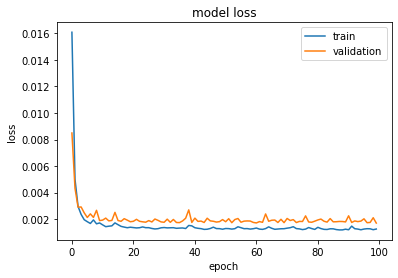

In [68]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Backtesting

In [60]:
def calc_kelly(prob_model, prob_bookie):
  p = prob_model
  q = 1 - p
  b = 1/prob_bookie - 1
  f = (p - (q/b))
  return f if f > 0 else 0


def set_params(self, **params):
  
  try:
    self.diff = params['diff']
  except KeyError:
    self.diff = None
  
  del params['diff']

  self.clf = self.clf.set_params(**params)
  
  return self.clf

'''
Very simple betting logic. Place a bet if predicted closing probability is higher than opening probability at Pinnacle.
Returns string in format ('HD') if bet on home and draw for example
'''
def betting_logic(row, diff=0):
  bets_tmp = ''
  if row['HC_Model'] > row['HO_Pinnacle'] + diff:
    bets_tmp = bets_tmp + 'H'
  if row['DC_Model'] > row['DO_Pinnacle'] + diff:
    bets_tmp = bets_tmp + 'D'
  if row['AC_Model'] > row['AO_Pinnacle'] + diff:
    bets_tmp = bets_tmp + 'A'
  return bets_tmp


'''
return df with model odds
'''
def return_model_odds(df_backtest, y_pred_probas):
  df_backtest['HC_Model'] = y_pred_probas[:,0]
  df_backtest['DC_Model'] = y_pred_probas[:,1]
  df_backtest['AC_Model'] = y_pred_probas[:,2]
  return df_backtest

'''
Add data to dataframe with winner 
'''
def return_model_target(df_backtest,y):
  df_backtest['Target'] = y.copy()
  return df_backtest

'''
Calculate which bets should be placed. Returns one column with a string of combinations, for example 'AD', Away and Draw.
Maybe should return 3 columns with a flag in each if a bet should be placed? 
'''
def return_bets_as_strings(df_backtest):
  df_backtest['Bets'] = df_backtest.apply(lambda row: betting_logic(row), axis=1)
  return df_backtest

'''
Calculate columns with bets as a binary flag
'''
def convert_bets_to_binary(df_backtest):
  df_backtest['Bet_H'] = df_backtest.apply(lambda row: 1 if 'H' in row['Bets'] else 0, axis=1)
  df_backtest['Bet_D'] = df_backtest.apply(lambda row: 1 if 'D' in row['Bets'] else 0, axis=1)
  df_backtest['Bet_A'] = df_backtest.apply(lambda row: 1 if 'A' in row['Bets'] else 0, axis=1)
  return df_backtest


'''
func that calculates bet size
WARNING: Is kelly reasonable when we have shitty models?
First reasonable bet size is constant % of roll? 
'''
def calc_bet_size_for_column(row, kelly_factor=1/4):
  if len(row['Bets']) == 0:
      f_bet = 0
  elif len(row['Bets']) == 1:
      if row['Bets'] == 'H':
          f_bet = kelly_factor * calc_kelly(row['HC_Model'], row['HO_Pinnacle'])
      elif row['Bets'] == 'D':
          f_bet = kelly_factor * calc_kelly(row['DC_Model'], row['DO_Pinnacle'])
      elif row['Bets'] == 'A':
          f_bet = kelly_factor * calc_kelly(row['AC_Model'], row['AO_Pinnacle'])
      else:
          f_bet = np.nan
      #WARNING: IF order changes from 'HA' -> 'AH' this will break
  elif len(row['Bets']) == 2:
      if 'HA' in row['Bets']:
          prob_win = row['HC_Model'] + row['AC_Model']
          f_bet = kelly_factor * calc_kelly(prob_win, row['HO_Pinnacle'] + row['AO_Pinnacle'])
      elif 'HD' in row['Bets']:
          prob_win = row['HC_Model'] + row['DC_Model']
          f_bet = kelly_factor * calc_kelly(prob_win, row['HO_Pinnacle'] + row['DO_Pinnacle'])
      elif 'DA' in row['Bets']:
          prob_win = row['DC_Model'] + row['AC_Model']
          f_bet = kelly_factor * calc_kelly(prob_win, row['DO_Pinnacle'] + row['AO_Pinnacle'])
      else:
          f_bet = np.nan
  else:
      #I ran into the case the model wanted to bet on all 3 outcomes. As a work-around. The model now bets 0 if it wants to bet on all 3 cases. /KJ
      f_bet = 0
  return f_bet

'''
returns df with bet size for H,D,A
'''
def calc_bet_size(df_backtest, kelly_factor):
  df_backtest['Bet_size_frac_H'] = df_backtest.apply(lambda row: calc_bet_size_for_column(row, kelly_factor)*row['Bet_H'], axis=1)
  df_backtest['Bet_size_frac_D'] = df_backtest.apply(lambda row: calc_bet_size_for_column(row, kelly_factor)*row['Bet_D'], axis=1)
  df_backtest['Bet_size_frac_A'] = df_backtest.apply(lambda row: calc_bet_size_for_column(row, kelly_factor)*row['Bet_A'], axis=1)
  return df_backtest

'''
This assumes you played Pinnacle open odds and payoff if you win is (pinnacle close - 1)

TODO: Clean this function?
'''
def trade_backtest(df_backtest, bankroll):
  df_backtest['Win_H'] = df_backtest.apply(lambda row: 1 if row['Bet_H'] == 1 and row['Target'] == 'H' else 0,axis=1)
  df_backtest['Win_D'] = df_backtest.apply(lambda row: 1 if row['Bet_D'] == 1 and row['Target'] == 'D' else 0,axis=1)
  df_backtest['Win_A'] = df_backtest.apply(lambda row: 1 if row['Bet_A'] == 1 and row['Target'] == 'A' else 0,axis=1)

  #Initate list of bankroll
  bankroll_list = np.zeros((len(df_backtest)))
  #Calculate outcome after first bet
  bankroll_list[0] = bankroll + bankroll*df_backtest['Bet_size_frac_H'].iloc[0]*(df_backtest['Win_H'].iloc[0]*(1/df_backtest['HO_Pinnacle'].iloc[0]-1)-(1-df_backtest['Win_H'].iloc[0]))
  bankroll_list[0] += bankroll*df_backtest['Bet_size_frac_D'].iloc[0]*(df_backtest['Win_D'].iloc[0]*(1/df_backtest['DO_Pinnacle'].iloc[0]-1)-(1-df_backtest['Win_D'].iloc[0])) 
  bankroll_list[0] += bankroll*df_backtest['Bet_size_frac_A'].iloc[0]*(df_backtest['Win_A'].iloc[0]*(1/df_backtest['AO_Pinnacle'].iloc[0]-1)-(1-df_backtest['Win_A'].iloc[0]))

  #Loop through the rest of the games
  for i in range(1, len(df_backtest)):
    outcome_H = bankroll_list[i-1]*df_backtest['Bet_size_frac_H'].iloc[i]*(df_backtest['Win_H'].iloc[i]*(1/df_backtest['HO_Pinnacle'].iloc[i]-1)-(1-df_backtest['Win_H'].iloc[i]))
    outcome_D = bankroll_list[i-1]*df_backtest['Bet_size_frac_D'].iloc[i]*(df_backtest['Win_D'].iloc[i]*(1/df_backtest['DO_Pinnacle'].iloc[i]-1)-(1-df_backtest['Win_D'].iloc[i]))
    outcome_A = bankroll_list[i-1]*df_backtest['Bet_size_frac_A'].iloc[i]*(df_backtest['Win_A'].iloc[i]*(1/df_backtest['AO_Pinnacle'].iloc[i]-1)-(1-df_backtest['Win_A'].iloc[i]))
    bankroll_list[i] = bankroll_list[i-1] + outcome_H + outcome_D + outcome_A

  #This column is the bankroll before the bet has been performed on the same row
  df_backtest['Bankroll_after_bet'] = bankroll_list

  #This column is the bankroll after the bet has been performed on the same row
  len_list = len(bankroll_list) - 1
  df_backtest['Bankroll_before_bet'] = np.insert(bankroll_list[0:len_list],0, bankroll)
  return df_backtest
  
'''
Calculate warte evaluation matric: hit_rate / avg_odds
As you can see below, this sums all the odds and take an average of that. Multiple ways you can do this. Take one metric for each outcome (H,D,A) ?
'''  
def calculate_war_eval_metric(df_backtest):
  avg_odds = (df_backtest['HC_Model'].sum() + df_backtest['AC_Model'].sum() + df_backtest['DC_Model'].sum()) / (len(df_backtest['HC_Model']) + len(df_backtest['AC_Model']) + len(df_backtest['DC_Model']))
  hit_rate = (df_backtest['Win_H'].sum() + df_backtest['Win_D'].sum() + df_backtest['Win_A'].sum()) / (df_backtest['Win_H'].count() + df_backtest['Win_D'].count() + df_backtest['Win_A'].count())
  war_eval_metric = hit_rate / avg_odds
  return war_eval_metric

'''
Calculate Profit and Loss (PnL)
Defined as final bankroll - initial bankroll
'''
def calculate_PnL(df_backtest, bankroll_init):
  bankroll_fin = df_backtest['Bankroll_after_bet'].iloc[-1]
  PnL = bankroll_fin - bankroll_init
  return PnL

'''
Calculate Portfolio Return on investing for backtesting df
Bankroll final / Initial bankroll - 1
Inspiration: https://www.reddit.com/r/sportsbook/comments/g743f3/basic_foundational_metrics_for_measuring_your/
'''
def calculate_portfolio_ROI(df_backtest, bankroll_init):
  bankroll_fin = df_backtest['Bankroll_after_bet'].iloc[-1]
  portfolio_ROI = bankroll_fin / bankroll_init - 1
  return portfolio_ROI


'''
Calculate wager per game played
'''
def calculate_wager_per_game(df_backtest):
  df_backtest['Wager_per_game'] = (df_backtest['Bet_size_frac_H'] + df_backtest['Bet_size_frac_D'] + df_backtest['Bet_size_frac_A'])*df_backtest['Bankroll_before_bet']
  return df_backtest 

'''
Calculate wagered ROI
Defined as 
Inspiration: https://www.reddit.com/r/sportsbook/comments/g743f3/basic_foundational_metrics_for_measuring_your/
'''
def calculate_wagered_ROI(df_bets, bankroll_init):
  total_wager = df_bets['Wager_per_game'].sum()
  PnL = calculate_PnL(df_bets,bankroll_init)
  wagered_ROI = PnL / total_wager
  return wagered_ROI

def calculate_outcome_per_game(df_backtest):
  df_backtest['Outcome'] = df_backtest['Bankroll_after_bet'] - df_backtest['Bankroll_before_bet']
  return df_backtest
  

'''
Backtest model
Target is dataframe containing winner in form ['H','D','A'] in a column. Needs to match the same matches and X_test and y_test obviously.
'''
def backtest_model(model, X_test, y_test, y_target):
  df_backtest = X_test.copy()
  y_pred = model.predict(df_backtest)
  df_backtest = return_model_target(df_backtest, y_target)
  df_backtest = return_model_odds(df_backtest, y_pred)
  df_backtest = return_bets_as_strings(df_backtest)
  df_backtest = convert_bets_to_binary(df_backtest)
  kelly_factor = 1/4
  df_backtest = calc_bet_size(df_backtest, kelly_factor)
  bankroll = 10000
  df_backtest = trade_backtest(df_backtest, bankroll)
  df_backtest = calculate_wager_per_game(df_backtest)
  Portfolio_PnL = calculate_PnL(df_backtest, bankroll)
  Portfolio_ROI = calculate_portfolio_ROI(df_backtest, bankroll)
  Wagered_ROI = calculate_wagered_ROI(df_backtest,bankroll)
  df_backtest = calculate_outcome_per_game(df_backtest)
  warte_eval_metric = calculate_war_eval_metric(df_backtest)
  df_backtest[['HC_Pinnacle','DC_Pinnacle','AC_Pinnacle']] = y_test
  df_backtest['Log_Bankroll_after_bet'] = np.log(df_backtest['Bankroll_after_bet'])
  return Portfolio_PnL, Portfolio_ROI, Wagered_ROI, warte_eval_metric, df_backtest


## Backtesting for real

In [ ]:
Portfolio_PnL,Portfolio_ROI, Wagered_ROI, warte_eval_metric, df_backtest = backtest_model(model, X_test_eng, y_test_eng, y_targets_eng)

Xtrain_scale_np = Xtrain_scale.to_numpy()
Xval_scale_np = Xval_scale.to_numpy()

y_train_np = y_train.to_numpy()
y_valid_np = y_valid.to_numpy()


print('PnL: ',Portfolio_PnL)
print('Portfolio ROI: ',Portfolio_ROI)
print('Wagered ROI: ',Wagered_ROI)
print('war eval metric: ', warte_eval_metric)

fig = px.line(df_backtest, y="Bankroll_after_bet", title='Roll')
fig.show()